In [55]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [56]:
# 隨機種子&資料
np.random.seed(42)
x = np.linspace(0, 10, 50)
# y誤差相同，固定為0.1
y = 2.5 * np.exp(-1.3*x)+np.random.normal(0, 0.1, x.size)
sigma = 0.1 * np.ones_like(y)

In [57]:
# model
def model(x, A, k):
    return A * np.exp(-k*x)


In [58]:
# 曲線的兩種設定
popt_true, pcov_true = curve_fit(model, x, y, sigma=sigma, absolute_sigma=True)
popt_false, pcov_false = curve_fit(model, x, y, sigma=sigma, absolute_sigma=False)

# 殘差計算
residuals_true = y - model(x, *popt_true)
residuals_false = y - model(x, *popt_false)

# 擬合曲線
x_fit = np.linspace(0, 10, 200)
y_fit_true = model(x_fit, *popt_true)
y_fit_false = model(x_fit, *popt_false)


In [59]:
# 列印擬合參數與不確定度
perr_true = np.sqrt(np.diag(pcov_true))
perr_false = np.sqrt(np.diag(pcov_false))

print("=== absolute_sigma=True ===")
print(f"A = {popt_true[0]:.4f} ± {perr_true[0]:.4f}")
print(f"k = {popt_true[1]:.4f} ± {perr_true[1]:.4f}")

print("\n=== absolute_sigma=False ===")
print(f"A = {popt_false[0]:.4f} ± {perr_false[0]:.4f}")
print(f"k = {popt_false[1]:.4f} ± {perr_false[1]:.4f}")

=== absolute_sigma=True ===
A = 2.5626 ± 0.0808
k = 1.2977 ± 0.0657

=== absolute_sigma=False ===
A = 2.5626 ± 0.0776
k = 1.2977 ± 0.0631


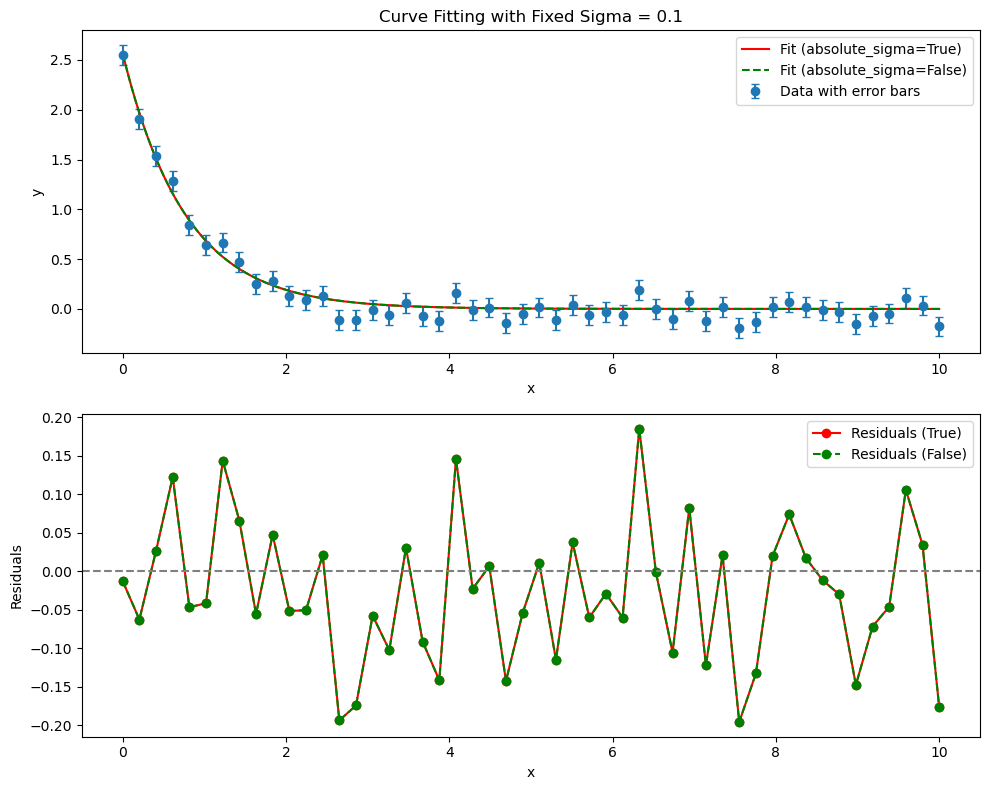

In [60]:
# 繪圖：資料與擬合結果
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.errorbar(x, y, yerr=sigma, fmt='o', capsize=3, label='Data with error bars')
# plt.fill_between(x_fit,
#                 model(x_fit, popt_true[0]-perr_true[0], popt_true[1]+perr_true[1]), 
#                 model(x_fit, popt_true[0]+perr_true[0], popt_true[1]-perr_true[1]), color='gray', alpha=1)
# plt.fill_between(x_fit,
#                 model(x_fit, popt_false[0]-perr_false[0], popt_false[1]+perr_false[1]), 
#                 model(x_fit, popt_false[0]+perr_false[0], popt_false[1]-perr_false[1]), color='gray', alpha=1)
plt.plot(x_fit, y_fit_true, 'r-', label='Fit (absolute_sigma=True)')
plt.plot(x_fit, y_fit_false, 'g--', label='Fit (absolute_sigma=False)')
plt.title('Curve Fitting with Fixed Sigma = 0.1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# 繪圖：殘差比較
plt.subplot(2, 1, 2)
plt.plot(x, residuals_true, 'ro-', label='Residuals (True)')
plt.plot(x, residuals_false, 'go--', label='Residuals (False)')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.show()
